In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.nonparametric import smoothers_lowess
from statsmodels.nonparametric import kernel_regression

np.set_printoptions(suppress=True)

In [2]:
def calculate_weights(n, h, k, x0):
    x = np.linspace(1/n, 1, n)
    Z = np.stack([np.power((x - x0)/h, i) for i in range(k + 1)], 1)
    W = np.diag(kernel_regression.kernel_func['gaussian'](h, x, x0))
    return W.dot(Z.dot(np.linalg.inv(Z.T.dot(W).dot(Z))))[:, 0]

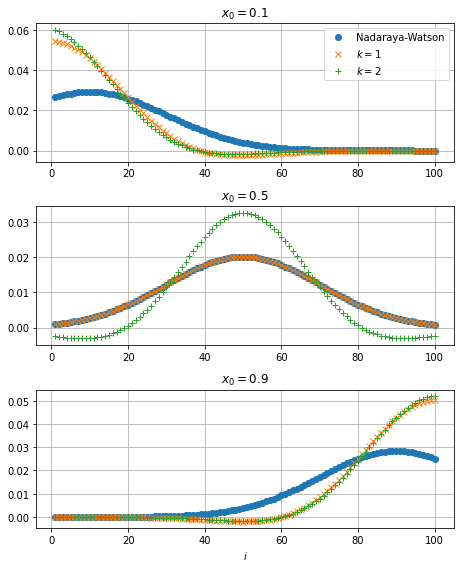

In [3]:
fig, axes = plt.subplots(nrows=3, figsize=(6.5, 8))
indices = np.linspace(1, 100, 100)
for i, (x0, ax) in enumerate(zip([0.1, 0.5, 0.9], axes)):
    ax.plot(
        indices, calculate_weights(n=100, h=0.2, k=0, x0=x0), 'o', label='Nadaraya-Watson')
    ax.plot(
        indices, calculate_weights(n=100, h=0.2, k=1, x0=x0), 'x', label='$k=1$')
    ax.plot(
        indices, calculate_weights(n=100, h=0.2, k=2, x0=x0), '+', label='$k=2$')
    if i == 0: ax.legend()
    ax.grid(True)
    ax.set_title(f'$x_0 = {x0}$')
ax.set_xlabel('$i$')
fig.tight_layout()
fig.savefig('loess.pdf')